# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

I would use the nf-core/differentialabundance pipeline, which is designed for differential expression analysis of RNA-seq data. This pipeline can handle the output from nf-core/rnaseq and perform statistical analysis to identify differentially expressed genes between different conditions or groups.

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

! nf-core pipelines launch nf-core/differentialabundance -r 1.5.0

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

nextflow run nf-core/differentialabundance -r 1.5.0 \
   --input samplesheet.csv \
   --contrasts data/contrasts.csv \
   --matrix data/salmon.merged.gene_counts.tsv \
   --genome GRCm38 \
   --outdir results_differential \
   -profile docker -resume
   
maybe exclude genome



Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

I created a samplesheet.csv file based on the column names in the provided expression matrix. The samplesheet contains information about the samples, including their IDs and conditions. I also used the provided contrasts file located in the data/ directory to specify the comparisons I wanted to make between different groups of samples. The genome was set to the mouse genome. The output directory (results_differential) was specified to store the results of the differential expression analysis. I used the -profile docker option to run the pipeline using Docker for containerization.


What were the outputs of the pipeline?

The pipeline outputs a variety of files, including:
- Differential expression results: These files contain information about the differentially expressed genes, including log fold changes, p-values, and adjusted p-values for each gene.
- Quality control reports: These reports provide information about the quality of the input data and the results of the analysis.
- Visualizations: The pipeline generates various plots and visualizations to help interpret the results, such as MA plots, volcano plots, and heatmaps.
- Summary statistics: These files provide summary statistics about the analysis, such as the number of differentially expressed genes and the distribution of expression levels across samples.
- Log files: These files contain detailed information about the execution of the pipeline, including any errors or warnings that occurred during the analysis.

Would you exclude any samples? If yes, which and why?

No. 

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In [11]:
import pandas as pd

# Load both contrasts
res1 = pd.read_csv("results_differential/tables/differential/condition_control_treated.deseq2.results.tsv", sep="\t")
res2 = pd.read_csv("results_differential/tables/differential/condition_control_treated_test.deseq2.results.tsv", sep="\t")

# Define DE genes (padj < 0.05, |log2FC| > 2)
set1 = set(res1.loc[(res1['padj'] < 0.05) & (res1['log2FoldChange'].abs() > 2), 'gene_id'])
set2 = set(res2.loc[(res2['padj'] < 0.05) & (res2['log2FoldChange'].abs() > 2), 'gene_id'])

# Print counts
print("Number of DE genes in condition_control_treated:", len(set1))
print("Number of DE genes in condition_control_treated_test:", len(set2))
print("Number of DE genes in both (overlap):", len(set1 & set2))
print("Unique to condition_control_treated:", len(set1 - set2))
print("Unique to condition_control_treated_test:", len(set2 - set1))


Number of DE genes in condition_control_treated: 15
Number of DE genes in condition_control_treated_test: 2
Number of DE genes in both (overlap): 0
Unique to condition_control_treated: 15
Unique to condition_control_treated_test: 2


The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc (Nucleus Accumbens): The NAc is a key region in the brain's reward circuitry. It plays a crucial role in processing rewarding stimuli, motivation, and reinforcement learning. It is involved in the release of dopamine, a neurotransmitter associated with pleasure and reward.
mPFC (medial Prefrontal Cortex): The mPFC is involved in higher cognitive functions, such as decision-making, social behavior, and emotional regulation. It is responsible for executive functions, including planning, working memory, and attention. The mPFC also plays a role in processing and integrating information from various brain regions.
VTA (Ventral Tegmental Area): The VTA is a part of the midbrain that contains dopaminergic neurons. It is a critical component of the brain's reward system and is involved in the release of dopamine in response to rewarding stimuli. The VTA plays a role in motivation, reinforcement learning, and addiction.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Supplementary Section?

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No, further analysis is required.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentioned.


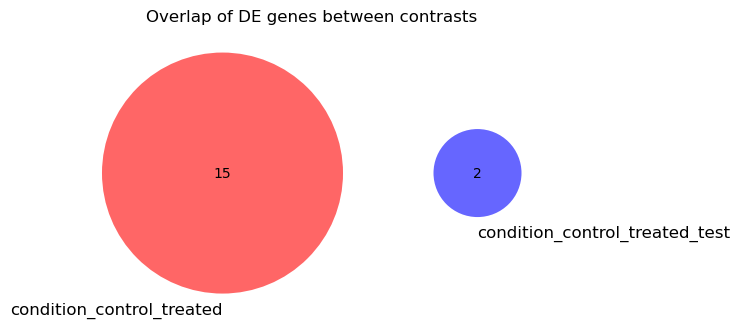

In [9]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Load results
res1 = pd.read_csv("results_differential/tables/differential/condition_control_treated.deseq2.results.tsv", sep="\t")
res2 = pd.read_csv("results_differential/tables/differential/condition_control_treated_test.deseq2.results.tsv", sep="\t")

# Select significant DE genes (padj < 0.05, |log2FC| > 2)
set1 = set(res1.loc[(res1['padj'] < 0.05) & (res1['log2FoldChange'].abs() > 2), 'gene_id'])
set2 = set(res2.loc[(res2['padj'] < 0.05) & (res2['log2FoldChange'].abs() > 2), 'gene_id'])

# Plot
plt.figure(figsize=(6,6))
venn2([set1, set2],
      set_labels=("condition_control_treated", "condition_control_treated_test"),
      set_colors=("red", "blue"),
      alpha=0.6)

plt.title("Overlap of DE genes between contrasts")
plt.show()